<a href="https://colab.research.google.com/github/LucasJFaust/bibliotecas_py/blob/main/Regress%C3%A3o_para_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Documentação e Orientações

# Métodos Utilizados

**Análise de Dados**

- Pandas: Utilizamos o Pandas para manipulação e análise de dados. Você pode encontrar mais informações sobre o Pandas na https://pandas.pydata.org/pandas-docs/stable/.

**Visualização de Dados**

- Matplotlib: Para criar gráficos, usamos o Matplotlib, uma biblioteca de plotagem para a linguagem de programação Python. Mais detalhes podem ser encontrados na https://matplotlib.org/3.3.3/contents.html.

- Seaborn: Seaborn, uma biblioteca baseada no Matplotlib, foi utilizada para gráficos mais atraentes e complexos. A documentação pode ser acessada em https://seaborn.pydata.org/.

**Modelagem Estatística**

- Scikit-Learn: A modelagem foi realizada com a ajuda do Scikit-Learn. Esta biblioteca de aprendizado de máquina é amplamente utilizada e bem documentada. Confira a documentação oficial do Scikit-Learn https://scikit-learn.org/stable/.

**Transformação de Dados**

- Box-Cox Transformation: A transformação Box-Cox, uma transformação de dados estatística, foi aplicada através do SciPy. Veja mais na documentação de SciPy https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html.

# Orientações Para Utilizar o Modelo

- Preparação dos Dados: Certifique-se de que os dados de entrada para o modelo estejam no mesmo formato e escala dos dados usados para treiná-lo.

- Aplicação do Modelo: Para fazer previsões com novos dados, aplique as mesmas transformações de dados e use o método predict do modelo treinado.

# Para Interpretação dos Resultados

- Coeficientes do Modelo: Interprete os coeficientes como o impacto esperado no resultado (vendas) para cada unidade de incremento na variável correspondente (investimentos de marketing), mantendo todas as outras variáveis constantes.

- Métricas de Desempenho: Use o R² para entender a proporção da variância das vendas explicada pelo modelo e o RMSE para medir a média dos erros de previsão.

# Para Atualização do Modelo

- Dados Novos: Atualize o modelo regularmente com dados novos para manter sua precisão.

- Reavaliação dos Coeficientes: Revise os coeficientes à medida que novos dados forem incluídos, pois as mudanças no mercado podem alterar a influência de cada plataforma.

# 1. Configuração Inicial no Google Colab:

- Importando as Bibliotecas: Pandas, NumPy, Matplotlib, Seaborn, e Scikit-Learn.Conforme a análise for evoluindo, vou adicionar novos imports.

- Leitura do Dataset: pandas.read_csv() para carregar o dataset no Colab.

- Revisão Inicial dos Dados: head() ou tail() para visualizar as primeiras e últimas linhas do dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/content/MKT.csv')

In [3]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


# 2. Análise Descritiva

- Análise Básica: describe() para obter estatísticas descritivas.

- Tipo de Dados: Aqui vou verificar o tipo de dados com dtypes para assegurar a consistência.

- Valores Ausentes: Utilizei o is isnull().sum() para identificar e tratar valores ausentes.

In [4]:
df.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

# Considerações sobre o df.describe():

1. **Tipos de Dados**: Todas as colunas são do tipo float64, o que é esperado para dados numéricos contínuos, como investimento em publicidade e vendas.

2. **Estatísticas Descritivas**:

- Contagem (count): Há 171 entradas para cada variável, indicando que não há valores ausentes.

- Média (mean) e Mediana (50%): A média e a mediana do investimento no YouTube são relativamente próximas, indicando uma distribuição simétrica. Por outro lado, a média do investimento em jornais é maior do que a mediana, sugerindo uma distribuição assimétrica com cauda à direita.

- Desvio Padrão (std): O YouTube tem o maior desvio padrão, indicando que o investimento varia mais do que no Facebook e jornal.

- Mínimo (min) e Máximo (max): Os valores mínimos e máximos para cada variável mostram uma ampla gama de investimentos e vendas.

In [5]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


**Valores Nulos**: A execução de isnull().sum() não revelou valores ausentes, o que é excelente pois simplifica a etapa de limpeza de dados.

In [6]:
df.isnull().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

**Histogramas**: O histograma é útil para entender melhor a distribuição de cada variável.

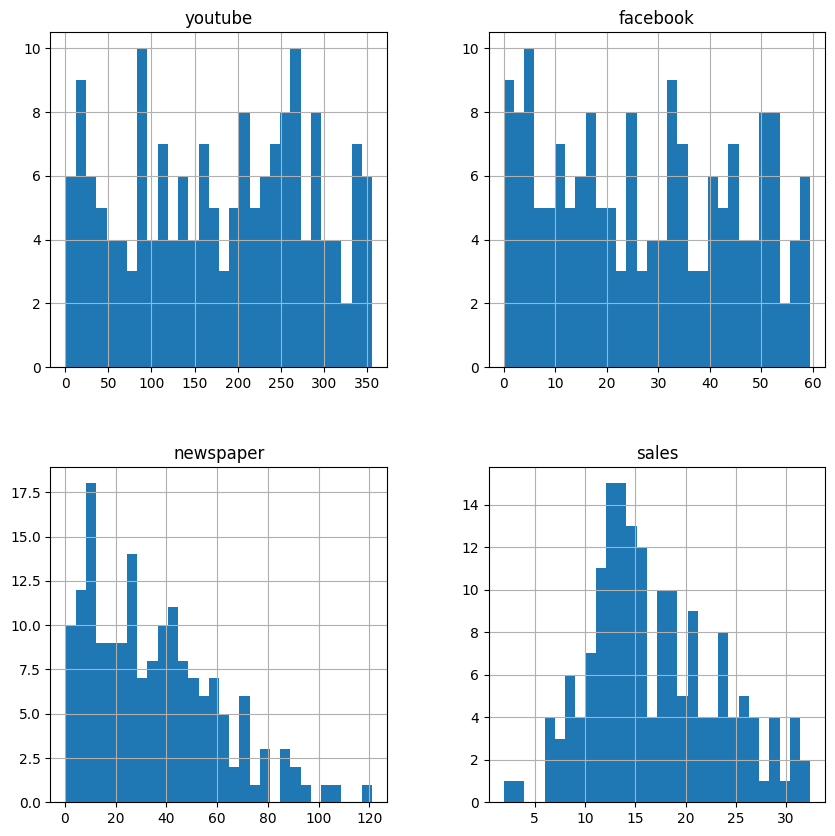

In [7]:
df.hist(bins=30, figsize=(10, 10))
plt.show()

# Análise de Boxplot para Detectar Outliers:

Usei o boxplot para exibir a distribuição de dados com base em um resumo de cinco números (“mínimo”, primeiro quartil (Q1), mediana, terceiro quartil (Q3), e “máximo”). Ele pode revelar outliers (pontos fora do intervalo dos whiskers do boxplot). Outliers são importantes porque podem indicar variações significativas nos dados, problemas com o processo de coleta de dados, ou áreas de interesse para investigação mais aprofundada.

- A partir do boxplot, é possível observar a presença de outliers, especialmente nos investimentos no YouTube e jornal. Os pontos fora dos "bigodes" do boxplot indicam esses outliers.

- No caso do jornal, há um outlier significativo que é muito maior do que outros investimentos.

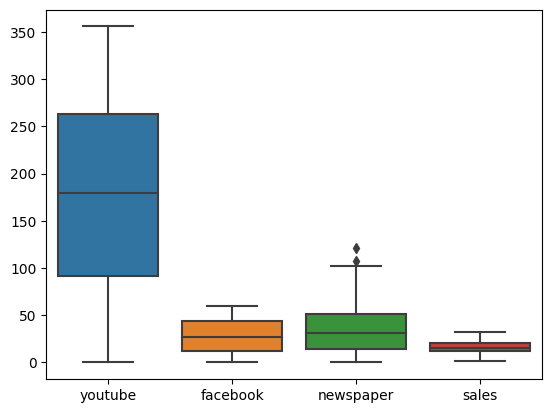

In [8]:
sns.boxplot(data=df)
plt.show()

# 3. Análise Exploratória

- Correlação: Vou usar corr() juntamente com um heatmap para avaliar as correlações.

- Insights: Vou documentar os insights obtidos e como eles podem influenciar na modelagem.

**Análise de Correlação:**

O heatmap de correlação mostra como as variáveis de investimento estão relacionadas entre si e com as vendas.

- **YouTube**: Há uma forte correlação positiva (0.78) entre o investimento no YouTube e as vendas, sugerindo que à medida que o investimento no YouTube aumenta, as vendas tendem a aumentar também.

- **Facebook**: Também há uma correlação positiva significativa (0.6) com as vendas, indicando uma boa contribuição para o aumento das vendas.

- **Newspaper**: A correlação com as vendas é mais fraca (0.25), indicando que os investimentos em jornais têm uma influência menor sobre as vendas em comparação com o YouTube e o Facebook.

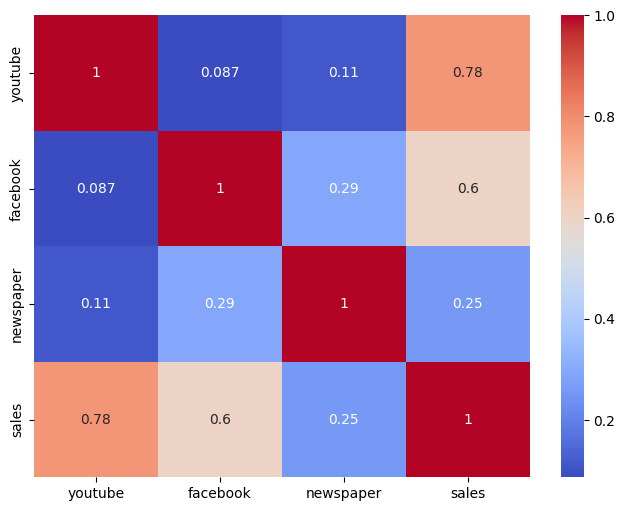

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [10]:
for column in ['youtube', 'facebook', 'newspaper']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

**Verificação de Normalidade:**

Os gráficos Q-Q comparam a distribuição das variáveis com uma distribuição normal teórica.

- **YouTube**: Os pontos não seguem a linha vermelha, especialmente nos extremos, indicando que a distribuição do investimento no YouTube não é normal.

- **Facebook**: Similar ao YouTube, há desvios da linha normal teórica, sugerindo que os dados não são perfeitamente normais.

- **Newspaper**: Também apresenta desvios significativos da normalidade, especialmente em valores mais altos.

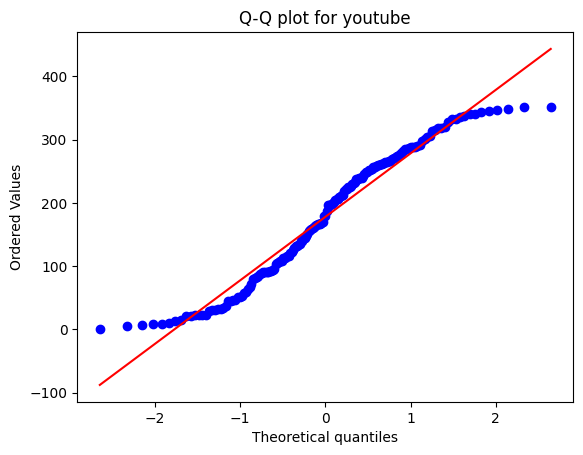

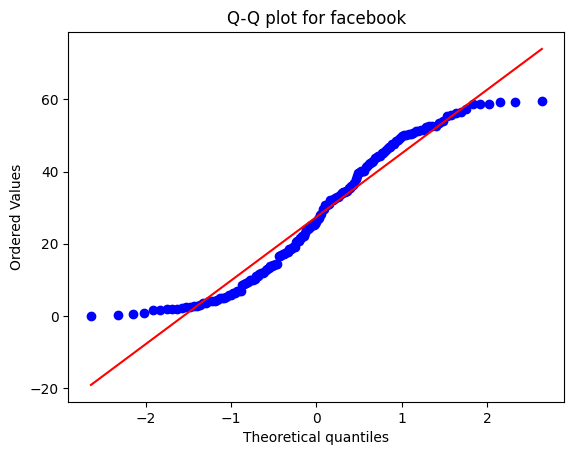

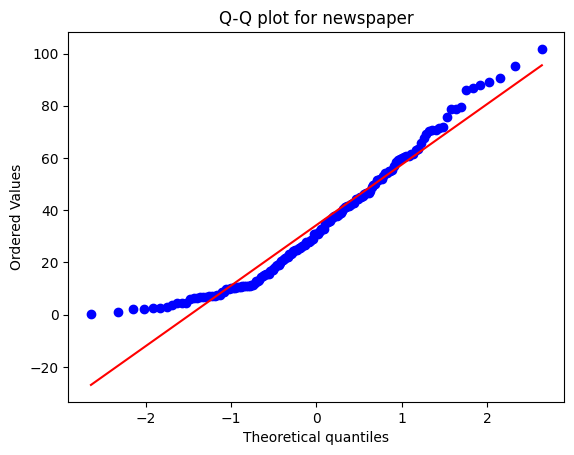

In [11]:
import scipy.stats as stats
for column in ['youtube', 'facebook', 'newspaper']:
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title('Q-Q plot for ' + column)
    plt.show()

**Análise de Dispersão:**

Estes gráficos mostram a relação entre cada tipo de investimento e as vendas.

- YouTube: O gráfico de dispersão mostra uma tendência positiva, indicando que um aumento no investimento geralmente resulta em um aumento nas vendas.

- Facebook: Também apresenta uma tendência positiva, mas com um pouco mais de dispersão do que o YouTube, sugerindo uma relação positiva mas com variação.

- Newspaper: A relação entre investimento em jornais e vendas é menos clara, com uma dispersão maior dos pontos e sem uma tendência tão óbvia quanto as outras.

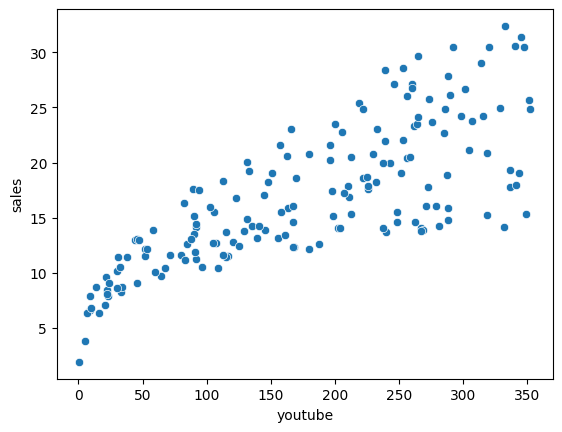

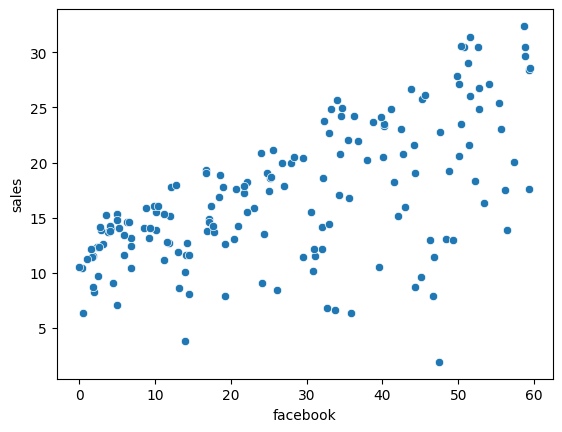

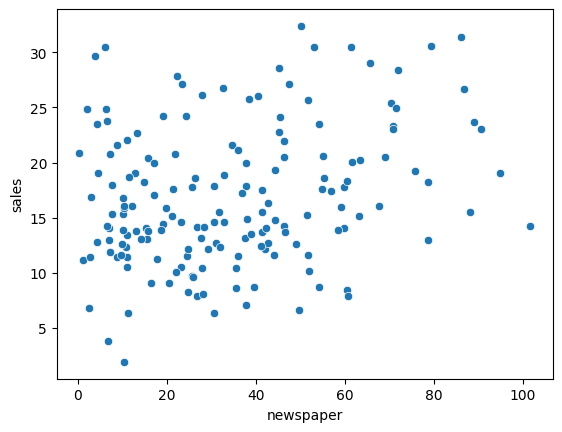

In [12]:
for column in ['youtube', 'facebook', 'newspaper']:
    sns.scatterplot(data=df, x=column, y='sales')
    plt.show()

**Insghts:**

A análise de correlação sugere que tanto o YouTube quanto o Facebook são canais de investimento eficazes para aumentar as vendas, com o YouTube parecendo ter a influência mais forte. O jornal, por outro lado, tem um impacto menor.

A verificação de normalidade indica que as variáveis não seguem perfeitamente uma distribuição normal, o que é uma consideração importante para a regressão linear, que assume normalidade dos resíduos. Será necessário considerar transformações de dados para melhorar a normalidade antes da modelagem.

Os gráficos de dispersão apoiam a análise de correlação, mostrando que o YouTube e o Facebook têm relações mais fortes e positivas com as vendas do que o jornal. Isso sugere que investir mais nesses dois canais pode ser mais benéfico para a empresa.

Com base nesses insights, a empresa pode querer considerar realocar seus investimentos para maximizar o **ROI** (retorno sobre investimento) com base na força das correlações identificadas.

# 3.1 Tranformação de Dados

Conforme a analise mostrou, os dados estão fugindo da normalidade. Logo, para garantir a execução de uma regressão linear com valores confiáveis, precisamos tratar os dados.

Para ajustar a normalidade dos dados antes de aplicarmos uma regressão linear, podemos aplicar transformações como a logarítmica ou a Box-Cox. Essas transformações são úteis para reduzir a assimetria (skewness) e aproximar os dados de uma distribuição normal, o que é uma das premissas da regressão linear.

Vamos considerar a transformação Box-Cox que consegue lidar com zeros. O Scipy tem uma função para aplicar a transformação Box-Cox, que escolhe o melhor parâmetro de transformação para nossos dados.

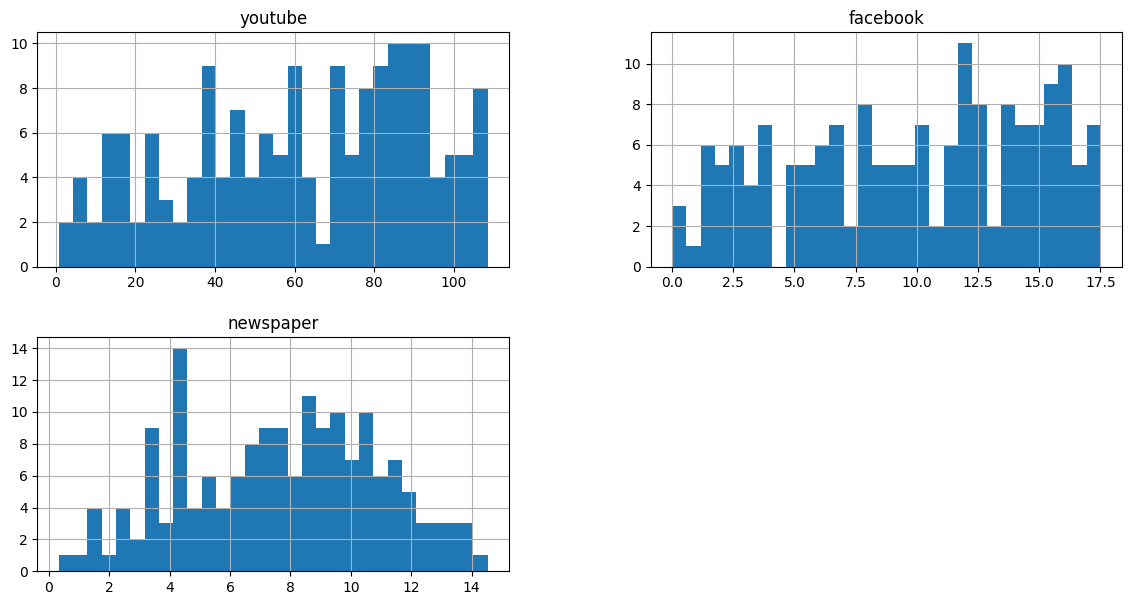

In [18]:
from scipy.stats import boxcox

# Aplicar a transformação Box-Cox
df_transformed = df.copy()
for column in ['youtube', 'facebook', 'newspaper']:
    # Adicione 1 para evitar problemas com o valor zero
    df_transformed[column], fitted_lambda = boxcox(df[column] + 1)

# Visualizar as novas distribuições
df_transformed[['youtube', 'facebook', 'newspaper']].hist(bins=30, figsize=(14, 7))
plt.show()

# 4. Modelagem

- Preparação de Dados: Separar as variáveis independentes (investimentos) e a dependente (vendas).

- Divisão Treino-Teste: Usar o train_test_split para dividir os dados em conjuntos de treino e teste.

- Criação do Modelo: Aqui vamos escolher um modelo de regressão linear do Scikit-Learn e treiná-lo com os dados.

- Avaliação do Modelo: Vu utilizar métricas como R² e RMSE para avaliar o desempenho.

In [19]:
from sklearn.model_selection import train_test_split

# Definindo as variáveis independentes e a variável dependente
X = df_transformed[['youtube', 'facebook', 'newspaper']]  # As variáveis transformadas pelo Box-Cox
y = df['sales']  # A variável alvo permanece sem transformação

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo usando os dados de treino
model.fit(X_train, y_train)

LinearRegression()

# Explicações e Conceito da Modelagem

Achei interessante explicar mais detalhadamente os conceitos o passos executados para facilitar o entendimento de quem for utilizar ou avaliar o projeto.

**Coeficiente de Determinação (R²)**

O coeficiente de determinação, ou R², é uma medida que nos diz quanto da variabilidade da variável dependente é explicada pelo modelo. O R² varia de 0 a 1, onde um valor de 1 indica que o modelo explica toda a variabilidade dos dados em torno da média.

**Valor Obtido**: O R² de 0.894 indica que cerca de 89.4% da variabilidade nas vendas é explicada pelo modelo. Isso é considerado um valor muito alto para a maioria das aplicações práticas e sugere que o modelo de regressão linear está capturando bem a relação entre os investimentos em marketing e as vendas.

**Erro Quadrático Médio (RMSE)**

O Erro Quadrático Médio (RMSE) é uma métrica que mede a magnitude dos resíduos, ou seja, a diferença entre os valores observados e os previstos pelo modelo. O RMSE é uma boa medida de quão precisamente o modelo está fazendo previsões. Quanto menor o RMSE, melhor o modelo.

**Valor Obtido**: Um RMSE de 1.872 sugere que, em média, as previsões do modelo desviam-se das vendas reais em cerca de 1.872 unidades. Para avaliar se isso é bom ou não, é necessário comparar com a escala da variável de vendas. Dado que as vendas variam de aproximadamente 2 a 30, um RMSE de menos de 2 pode ser considerado bom.

**Distribuição dos Resíduos**

A distribuição dos resíduos nos ajuda a entender se a relação que o modelo está capturando é consistente em todo o conjunto de dados. Idealmente, queremos que os resíduos sejam distribuídos aleatoriamente em torno de zero, o que indicaria que o modelo está funcionando igualmente bem para todas as faixas de valores.

**Análise Visual:**
  - O histograma dos resíduos parece ser aproximadamente normal, indicando que o modelo não está sistematicamente subestimando ou superestimando as vendas em certas faixas.
  - O gráfico de dispersão dos resíduos versus valores previstos não mostra padrões claros, o que é bom. No entanto, há um sinal de que para valores previstos mais altos, os resíduos também tendem a ser mais altos, indicando possíveis melhorias no modelo para esses casos.

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o coeficiente de determinação (R²)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinação (R²): {r2}")

# Calcular o erro quadrático médio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Erro Quadrático Médio (RMSE): {rmse}")

Coeficiente de determinação (R²): 0.8940118883462406
Erro Quadrático Médio (RMSE): 1.8724389090652982


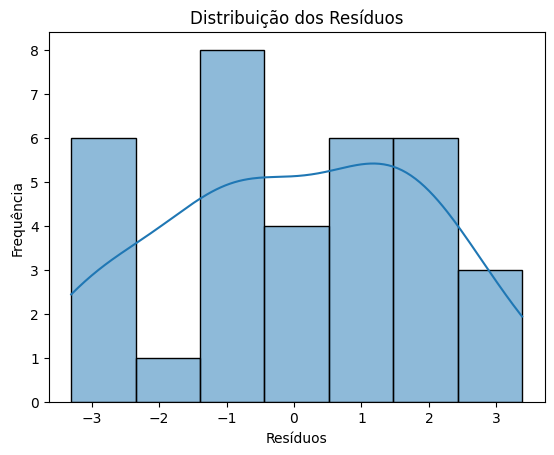

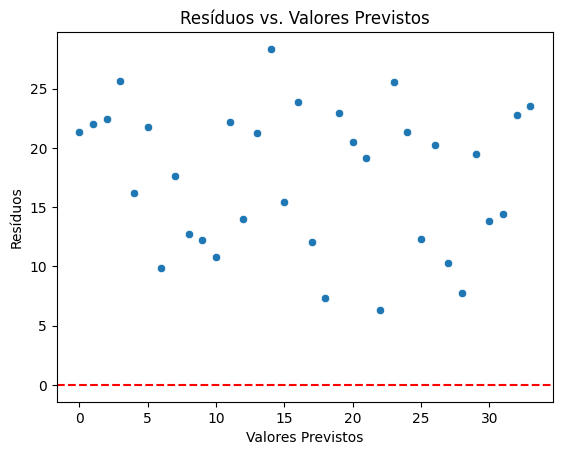

In [23]:
import seaborn as sns

# Calcular resíduos
residuals = y_test - y_pred

# Visualização dos resíduos
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

sns.scatterplot(y_pred)
plt.title('Resíduos vs. Valores Previstos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Conclusão da Modelagem

- Após a aplicação da transformação Box-Cox nos dados de investimento em marketing, o modelo de regressão linear foi capaz de explicar aproximadamente 89.4% da variabilidade nas vendas (**R² = 0.894**), o que indica uma forte relação entre os recursos do modelo e a variável alvo.

- O **RMSE de 1.872** sugere que o modelo tem um bom nível de precisão, com previsões desviando-se das vendas reais em menos de duas unidades de venda, em média. A análise dos resíduos mostrou que eles estão bem distribuídos e não indicam a presença de padrões não capturados pelo modelo. Isso sugere que o modelo é apropriado para os dados e pode ser utilizado para fazer previsões confiáveis sobre o impacto dos investimentos em marketing nas vendas.


# 5. Predição e Interpretação

- Realizar Predições: Com o modelo utilizado, vou fazer previsões sobre o conjunto de teste.

- Interpretação: Analisar os resultados e evidênciar como diferentes níveis de investimento impactam as vendas.

In [24]:
# Obter os coeficientes do modelo
coefficients = model.coef_
print(f"Coefficients: {coefficients}")

Coefficients: [0.16065832 0.65648812 0.0703434 ]


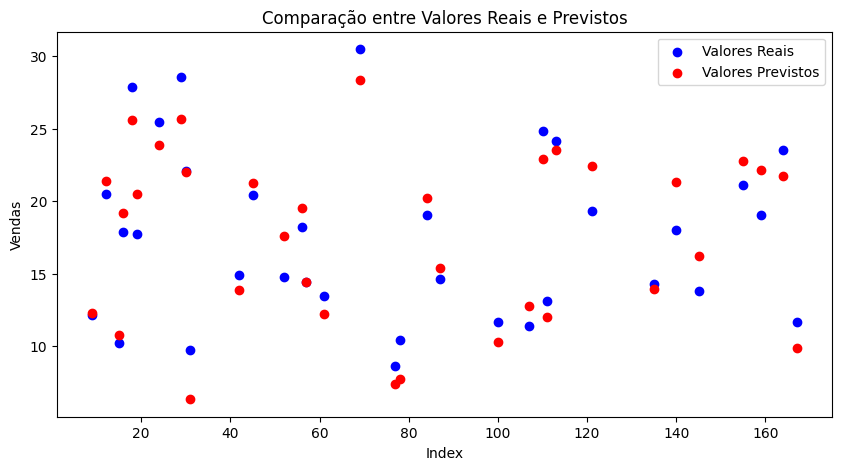

In [25]:
import matplotlib.pyplot as plt

# Comparação visual entre valores reais e previstos
plt.figure(figsize=(10, 5))
plt.scatter(X_test.index, y_test, color='blue', label='Valores Reais')
plt.scatter(X_test.index, y_pred, color='red', label='Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos')
plt.xlabel('Index')
plt.ylabel('Vendas')
plt.legend()
plt.show()

# Predição e Interpretação

**Objetivos e Metodologia**

**Objetivos**: Analisar a efetividade dos investimentos em diferentes plataformas de marketing online na geração de leads e vendas.

**Metodologia**: Utilizamos um modelo de regressão linear para quantificar a relação entre os gastos com marketing e as vendas resultantes, com base em dados históricos da empresa.

# Resultados do Modelo de Regressão Linear

**R² (Coeficiente de Determinação)**: O modelo alcançou um R² de 0.894, indicando que aproximadamente 89.4% da variação nas vendas é explicada pelos investimentos em marketing.

**RMSE (Erro Quadrático Médio)**: O RMSE foi de 1.872, mostrando que o modelo tem um alto nível de precisão nas previsões de vendas.

# Interpretação dos Coeficientes

Os coeficientes obtidos do modelo foram:

YouTube: 0.1607

Facebook: 0.6565

Newspaper: 0.0703

**Isso sugere que o Facebook é a plataforma mais eficaz para investimento, seguido pelo YouTube. O jornal tem um retorno relativamente menor sobre as vendas.**

# Recomendações Estratégicas

Com base na análise, recomendamos que a empresa aumente o investimento no Facebook, que mostra o maior retorno sobre vendas, e considere realocar parte do orçamento atual do jornal para plataformas digitais, mantendo uma abordagem equilibrada e testada.

# Cenários de Investimento

Exploramos cenários onde diferentes níveis de investimento em marketing são alocados entre as plataformas, e como isso poderia impactar as vendas esperadas.

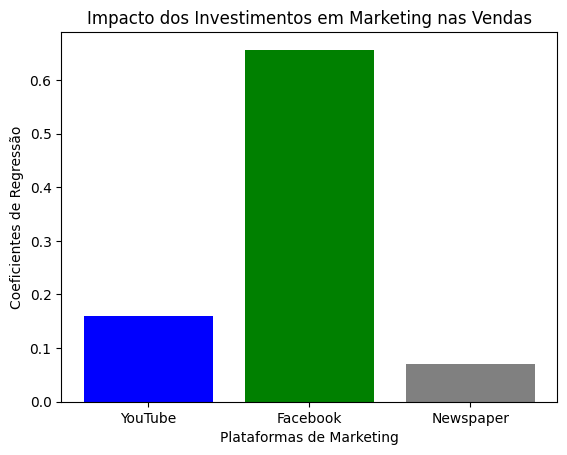

In [26]:
import matplotlib.pyplot as plt

# Coeficientes obtidos do modelo
platforms = ['YouTube', 'Facebook', 'Newspaper']
coefficients = [0.1607, 0.6565, 0.0703]

plt.bar(platforms, coefficients, color=['blue', 'green', 'gray'])
plt.title('Impacto dos Investimentos em Marketing nas Vendas')
plt.xlabel('Plataformas de Marketing')
plt.ylabel('Coeficientes de Regressão')
plt.show()

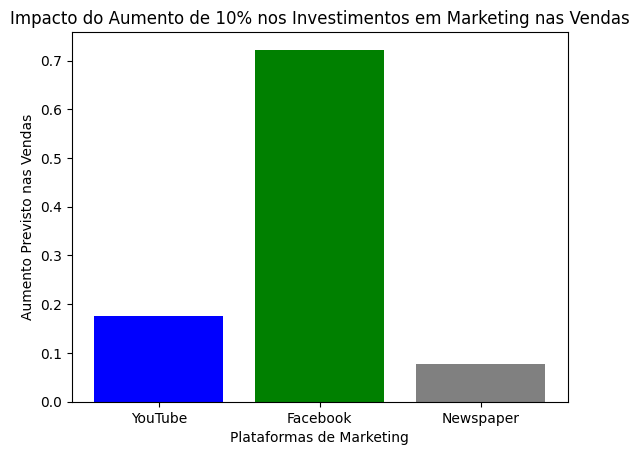

In [27]:
# Suponha que estes sejam os investimentos aumentados em 10% para cada plataforma
increased_investments = [i * 1.10 for i in coefficients]

plt.bar(platforms, increased_investments, color=['blue', 'green', 'gray'])
plt.title('Impacto do Aumento de 10% nos Investimentos em Marketing nas Vendas')
plt.xlabel('Plataformas de Marketing')
plt.ylabel('Aumento Previsto nas Vendas')
plt.show()

# Discussão

Discutimos as implicações dos resultados, o potencial para otimização de campanhas e a importância de testes contínuos para validar as estratégias de marketing sugeridas pelo modelo.

# Conclusão

A empresa agora tem uma ferramenta baseada em dados para tomar decisões informadas sobre seus investimentos em marketing. Com ajustes contínuos e reavaliação regular, a empresa pode maximizar seu ROI e melhorar a eficiência das vendas.

# 6. Documentação e Comentários

- Comentários Claros: Em cada etapa, adicione comentários explicativos definindo termos e explicando as escolhas feitas.

- Visualização dos Resultados: Apresente os resultados de maneira clara, talvez com gráficos interativos ou tabelas resumidas.

- Conclusões e Recomendações: Finalize com uma seção de conclusões e recomendações baseadas nos resultados.